<a href="https://colab.research.google.com/github/almumred/kan/blob/main/Online%20Retail%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# Online Retail II UCI – Analysis
# Dataset: mashlyn/online-retail-ii-uci
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [5]:
import pandas as pd
import os
# رﺎﺴﻤﻟا ﻲﻓ ةدﻮﺟﻮﻤﻟا تﺎﻔﻠﻤﻟا ضﺮﻋ
files = os.listdir(path)
print("ﺔﺣﺎﺘﻤﻟا تﺎﻔﻠﻤﻟا:", files)
# تﺎﻧﺎﯿﺒﻟا ﻞﯿﻤﺤﺗ (ﻮھ ﻒﻠﻤﻟا نأ ضﺮﺘﻔﻨﺳ 'online_retail_II.csv')
csv_file = os.path.join(path, 'online_retail_II.csv')
df = pd.read_csv(csv_file)
print("حﺎﺠﻨﺑ تﺎﻧﺎﯿﺒﻟا ﻞﯿﻤﺤﺗ ﻢﺗ!")
print(f"ﻲﻟوﻷا تﺎﻧﺎﯿﺒﻟا ﻢﺠﺣ: {df.shape}")
df.head()

ﺔﺣﺎﺘﻤﻟا تﺎﻔﻠﻤﻟا: ['online_retail_II.csv']
حﺎﺠﻨﺑ تﺎﻧﺎﯿﺒﻟا ﻞﯿﻤﺤﺗ ﻢﺗ!
ﻲﻟوﻷا تﺎﻧﺎﯿﺒﻟا ﻢﺠﺣ: (1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
data_path = "/kaggle/input/online-retail-ii-uci/online_retail_II.csv"

raw = pd.read_csv(data_path)

raw.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
raw.shape


(1067371, 8)

In [11]:
# Columns
raw.columns.tolist()

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [12]:
# Info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [13]:
# Missing Values per column
raw.isna().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [14]:
print("\nDate range:", raw["InvoiceDate"].min(), "→", raw["InvoiceDate"].max())
print("Unique Customers:", raw["Customer ID"].nunique())
print("Unique Products:", raw["StockCode"].nunique())
print("Countries:", raw["Country"].nunique())


Date range: 2009-12-01 07:45:00 → 2011-12-09 12:50:00
Unique Customers: 5942
Unique Products: 5305
Countries: 43


In [15]:
df = raw.copy()

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
# Standardize column names
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
# Rename to simpler names
df = df.rename(columns={
    "invoice": "invoice_no",
    "stockcode": "stock_code",
    "invoicedate": "invoice_date",
    "price": "unit_price",
})

df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
# Missing Customer ID Transactions
missing_cust = raw["Customer ID"].isna().sum()
missing_pct = missing_cust / len(raw) * 100
print("missing customer ID: ", missing_cust )
print("Missing Percentage:", missing_pct)

missing customer ID:  243007
Missing Percentage: 22.766872999172733


In [20]:
# Cancellation Transactions
cancellations = raw["Invoice"].str.startswith("C").sum()
cancel_pct = cancellations / len(raw) * 100
print("Cancellation Transactions:", cancellations)
print("Percentage:", cancel_pct)

Cancellation Transactions: 19494
Percentage: 1.8263565339511754


In [21]:
# Implausible values: negative or zero Quantity OR UnitPrice
implausible_mask = (raw["Quantity"] <= 0) | (raw["Price"] <= 0)
implausible_rows = implausible_mask.sum()
implausible_pct = implausible_rows / len(raw) * 100
print("Implausible Transactions:", implausible_rows)
print("Percentage:", implausible_pct)

Implausible Transactions: 25700
Percentage: 2.4077851093949527


In [22]:
print(f"Missing CustomerID:{missing_pct:.2f}%")
print(f"Cancellations:     {cancel_pct:.2f}%")
print(f"Implausible:       {implausible_pct:.2f}%")

Missing CustomerID:22.77%
Cancellations:     1.83%
Implausible:       2.41%


In [23]:
print("Before:", raw.shape)

# Drop rows with missing Customer ID
df = df.dropna(subset=["customer_id"])

print("After:", df.shape)

Before: (1067371, 8)
After: (824364, 8)


In [24]:
# Convert types
df["customer_id"] = df["customer_id"].astype(int)
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [25]:
# Flag cancellations
df["is_cancellation"] = df["invoice_no"].astype(str).str.startswith("C")

In [26]:
# Remove cancellations for KPI & satisfaction analysis
df = df[~df["is_cancellation"]].copy()

In [27]:
# Remove invalid quantity and price
df = df[(df["quantity"] > 0) & (df["unit_price"] > 0)]

In [28]:
# Compute transaction value
df["transaction_value"] = df["quantity"] * df["unit_price"]

In [35]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,is_cancellation,transaction_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,30.0


In [30]:
print("After cleaning shape:", df.shape)
print("Unique customers:", df["customer_id"].nunique())

After cleaning shape: (805549, 10)
Unique customers: 5878


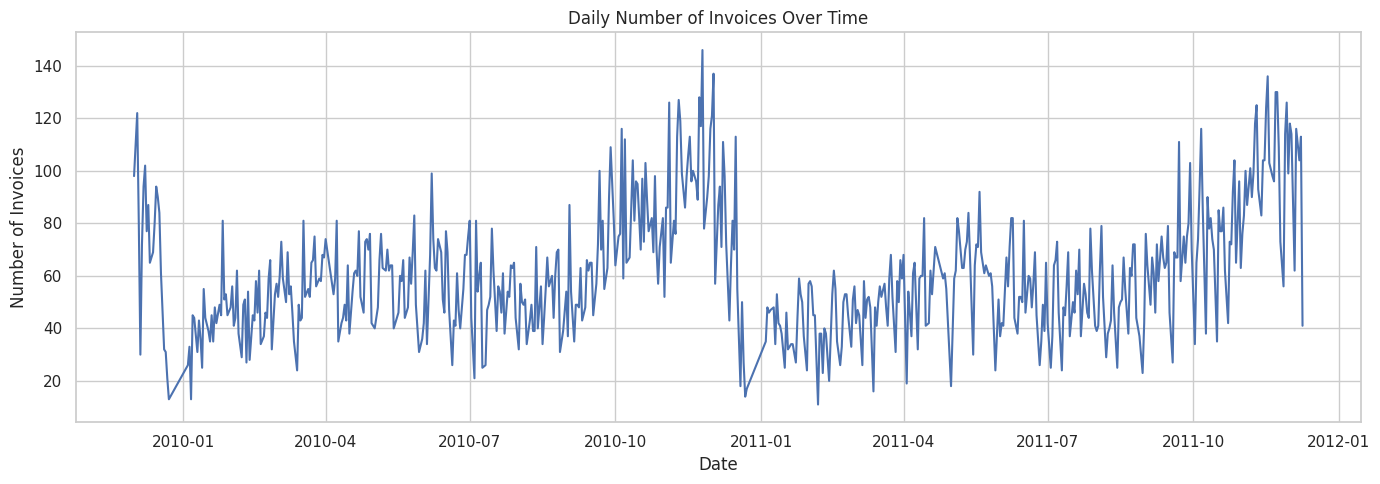

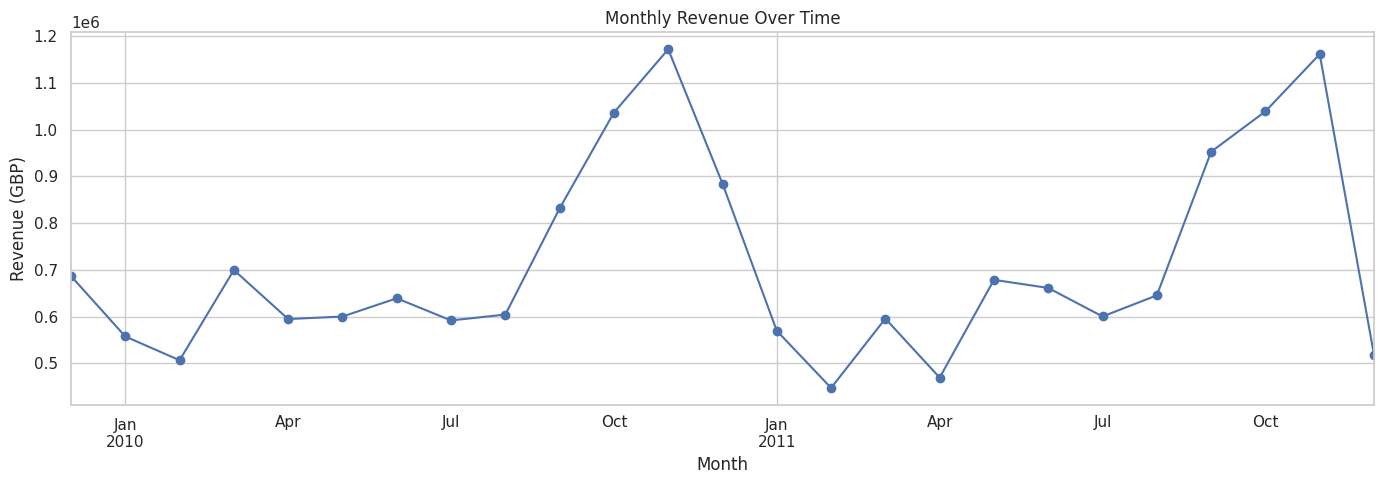

In [31]:
# Daily transactions
daily_tx = df.groupby(df["invoice_date"].dt.date)["invoice_no"].nunique()

plt.figure(figsize=(14, 5))
daily_tx.plot()
plt.title("Daily Number of Invoices Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Invoices")
plt.tight_layout()
plt.show()

# Monthly revenue
monthly_revenue = df.groupby(df["invoice_date"].dt.to_period("M"))["transaction_value"].sum()

plt.figure(figsize=(14, 5))
monthly_revenue.plot(marker="o")
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue (GBP)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2980605445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


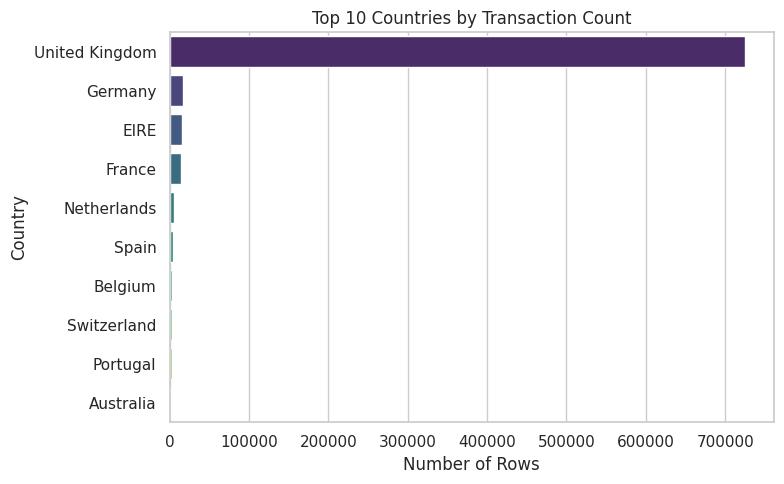

In [32]:
# Top Countries
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Transaction Count")
plt.xlabel("Number of Rows")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [36]:
# Reference date = last invoice date in dataset
ref_date = df["invoice_date"].max()

# Aggregate per customer
cust = df.groupby("customer_id").agg(
    last_purchase_date=("invoice_date", "max"),
    first_purchase_date=("invoice_date", "min"),
    n_invoices=("invoice_no", "nunique"),
    n_items=("quantity", "sum"),
    n_products=("stock_code", "nunique"),
    revenue=("transaction_value", "sum")
).reset_index()

# KPIs
cust["recency_days"] = (ref_date - cust["last_purchase_date"]).dt.days
cust["frequency"] = cust["n_invoices"]
cust["monetary"] = cust["revenue"]
cust["aov"] = cust["revenue"] / cust["n_invoices"]
cust["avg_items_per_order"] = cust["n_items"] / cust["n_invoices"]
cust["customer_tenure_days"] = (cust["last_purchase_date"] - cust["first_purchase_date"]).dt.days

cust.head()

,customer_id,last_purchase_date,first_purchase_date,n_invoices,n_items,n_products,revenue,recency_days,frequency,monetary,aov,avg_items_per_order,customer_tenure_days
0,12346,2011-01-18 10:01:00,2009-12-14 08:34:00,12,74285,27,77556.46,325,12,77556.46,6463.038333,6190.416667,400
1,12347,2011-12-07 15:52:00,2010-10-31 14:20:00,8,3286,126,5633.32,1,8,5633.32,704.165000,410.750000,402
2,12348,2011-09-25 13:13:00,2010-09-27 14:59:00,5,2714,25,2019.40,74,5,2019.40,403.880000,542.800000,362
3,12349,2011-11-21 09:51:00,2010-04-29 13:20:00,4,1624,138,4428.69,18,4,4428.69,1107.172500,406.000000,570
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,197,17,334.40,309,1,334.40,334.400000,197.000000,0


In [37]:
# Quick Summary
cust[["recency_days", "frequency", "monetary", "aov", "n_products", "avg_items_per_order"]].describe().T

,count,mean,std,min,25%,50%,75%,max
recency_days,5878.0,200.331916,209.338707,0.00,25.0000,95.000000,379.00,738.00
frequency,5878.0,6.289384,13.009406,1.00,1.0000,3.000000,7.00,398.00
monetary,5878.0,3018.616737,14737.731040,2.95,348.7625,898.915000,2307.09,608821.65
aov,5878.0,391.726538,1215.071054,2.95,181.6525,285.070500,420.57,84236.25
n_products,5878.0,81.989112,116.484552,1.00,19.0000,45.000000,103.00,2550.00
avg_items_per_order,5878.0,251.125203,1424.751476,1.00,93.5000,157.708333,262.00,87167.00


In [38]:
# Define dataset end date
dataset_end_date = pd.to_datetime('2011-12-09')

In [39]:
# ============================================================================
# PROXY 1: Repeat Purchase Behavior
# Definition: Satisfied if customer made >= 3 purchases in 24 months
# ============================================================================

cust['repeat_purchase_satisfied'] = (cust['frequency'] >= 3).astype(int)

# Counts
repeat_purchase_count = cust['repeat_purchase_satisfied'].value_counts()
# Display results
repeat_purchase_dist = cust['repeat_purchase_satisfied'].value_counts(normalize=True)

print(f"PROXY 1: Repeat Purchase (>= 3 purchases)")
print(
    f"  Satisfied (>= 3 purchases): "
    f"{repeat_purchase_count.get(1, 0)} ({repeat_purchase_dist.get(1, 0)*100:.1f}%)"
)
print(
    f"  Dissatisfied (< 3 purchases): "
    f"{repeat_purchase_count.get(0, 0)} ({repeat_purchase_dist.get(0, 0)*100:.1f}%)"
)
print()

PROXY 1: Repeat Purchase (>= 3 purchases)
  Satisfied (>= 3 purchases): 3311 (56.3%)
  Dissatisfied (< 3 purchases): 2567 (43.7%)



In [40]:
# ============================================================================
# PROXY 2: 6-Month Activity Status
# Definition: Satisfied if customer purchased in last 6 months (June-Dec 2011)
# ============================================================================

# Define 6-month window
six_month_window_start = dataset_end_date - pd.DateOffset(months=6)  # June 2011

# Create proxy: 1 if purchased in last 6 months, 0 otherwise
cust['six_month_activity_satisfied'] = (
    cust['last_purchase_date'] >= six_month_window_start
).astype(int)

# Display results
six_month_dist = cust['six_month_activity_satisfied'].value_counts(normalize=True)
six_month_count = cust['six_month_activity_satisfied'].sum()
six_month_pct = (six_month_count / len(cust)) * 100

print("PROXY 2: 6-Month Activity Status")
print(f"  Window: June 2011 - December 2011")
print(f"  Satisfied (last 6 months): {six_month_count} customers ({six_month_pct:.1f}%)")
print(f"  Dissatisfied (> 6 months): {len(cust) - six_month_count} customers ({100 - six_month_pct:.1f}%)")
print()

PROXY 2: 6-Month Activity Status
  Window: June 2011 - December 2011
  Satisfied (last 6 months): 3493 customers (59.4%)
  Dissatisfied (> 6 months): 2385 customers (40.6%)



In [41]:
# ============================================================================
# PROXY 3: High RFM Composite Score
# Definition: Satisfied if RFM score in top 25% (>= 10)
# ============================================================================

# Convert RFM metrics to quintile scores (1-5)
cust['recency_score'] = pd.qcut(cust['recency_days'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
cust['frequency_score'] = pd.qcut(cust['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
cust['monetary_score'] = pd.qcut(cust['monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)

# Calculate RFM composite score (equal weighting)
cust['rfm_score'] = (
    cust['recency_score'] * 0.33 +
    cust['frequency_score'] * 0.33 +
    cust['monetary_score'] * 0.33
)

# Top 25% threshold
rfm_threshold = cust['rfm_score'].quantile(0.75)
cust['high_rfm_satisfied'] = (cust['rfm_score'] >= rfm_threshold).astype(int)

# Display results
rfm_dist = cust['high_rfm_satisfied'].value_counts(normalize=True)
rfm_count = cust['high_rfm_satisfied'].sum()

print("PROXY 3: High RFM Composite Score")
print(f"  RFM Threshold (Top 25%): {rfm_threshold:.2f}")
print(f"  Satisfied (Top 25%): {rfm_count} customers ({(rfm_count/len(cust))*100:.1f}%)")
print(f"  Dissatisfied (Bottom 75%): {len(cust) - rfm_count} customers ({((len(cust)-rfm_count)/len(cust))*100:.1f}%)")
print()

PROXY 3: High RFM Composite Score
  RFM Threshold (Top 25%): 3.63
  Satisfied (Top 25%): 1849 customers (31.5%)
  Dissatisfied (Bottom 75%): 4029 customers (68.5%)



In [42]:
# ============================================================================
# PROXY 4: Positive Spending Growth Trajectory
# Definition: Satisfied if AOV slope > 0.5 (positive spending growth)
# ============================================================================

def calculate_aov_slope(customer_id):
    """Calculate AOV slope for a customer's purchase history"""
    customer_data = df[df['customer_id'] == customer_id].sort_values('invoice_date')

    # Need at least 3 transactions for meaningful slope
    if len(customer_data) < 3:
        return np.nan

    # Calculate AOV per transaction
    customer_data = customer_data.copy()
    customer_data['transaction_aov'] = (customer_data['quantity'] * customer_data['unit_price'])

    # Get unique transaction AOVs
    transaction_aovs = customer_data.groupby('invoice_no')['transaction_aov'].sum().values

    # Fit linear regression: AOV = b0 + b1 * Time
    X = np.arange(len(transaction_aovs)).reshape(-1, 1)
    y = transaction_aovs

    try:
        model = LinearRegression()
        model.fit(X, y)
        return model.coef_
    except:
        return np.nan

# Calculate AOV slope for each customer
print("Calculating AOV slopes (this may take a moment)...")
cust['aov_slope'] = cust['customer_id'].apply(calculate_aov_slope)

# Create proxy: 1 if slope > 0.5, 0 otherwise
cust['growth_trajectory_satisfied'] = (cust['aov_slope'] > 0.5).astype(int)

# Display results
growth_dist = cust['growth_trajectory_satisfied'].value_counts(normalize=True)
growth_count = cust['growth_trajectory_satisfied'].sum()

print("PROXY 4: Positive Spending Growth Trajectory")
print(f"  Slope Threshold: > 0.5")
print(f"  Satisfied (positive slope): {growth_count} customers ({(growth_count/len(cust))*100:.1f}%)")
print(f"  Dissatisfied (flat/declining): {len(cust) - growth_count} customers ({((len(cust)-growth_count)/len(cust))*100:.1f}%)")
print()

Calculating AOV slopes (this may take a moment)...
PROXY 4: Positive Spending Growth Trajectory
  Slope Threshold: > 0.5
  Satisfied (positive slope): 1772 customers (30.1%)
  Dissatisfied (flat/declining): 4106 customers (69.9%)



In [43]:
# Calculate proxy correlations
proxies = ['repeat_purchase_satisfied', 'six_month_activity_satisfied', 'high_rfm_satisfied', 'growth_trajectory_satisfied']
proxy_names = ['Repeat Purchase', '6-Month Activity', 'High RFM', 'Growth Trajectory']

# Correlation matrix
correlation_matrix = cust[proxies].corr()
print("Proxy Intercorrelation Matrix:")
print(correlation_matrix.round(3))
print()

Proxy Intercorrelation Matrix:
                              repeat_purchase_satisfied  \
repeat_purchase_satisfied                         1.000   
six_month_activity_satisfied                      0.427   
high_rfm_satisfied                                0.557   
growth_trajectory_satisfied                       0.309   

                              six_month_activity_satisfied  \
repeat_purchase_satisfied                            0.427   
six_month_activity_satisfied                         1.000   
high_rfm_satisfied                                   0.149   
growth_trajectory_satisfied                          0.174   

                              high_rfm_satisfied  growth_trajectory_satisfied  
repeat_purchase_satisfied                  0.557                        0.309  
six_month_activity_satisfied               0.149                        0.174  
high_rfm_satisfied                         1.000                        0.202  
growth_trajectory_satisfied               

In [44]:
# Mean intercorrelation
upper_tri = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]
mean_correlation = upper_tri.mean()
print(f"Mean Proxy Intercorrelation: r = {mean_correlation:.3f}")
print(f"Range: r = {upper_tri.min():.3f} to r = {upper_tri.max():.3f}")
print()

Mean Proxy Intercorrelation: r = 0.303
Range: r = 0.149 to r = 0.557



In [45]:
# Cohen's Kappa agreement analysis
from sklearn.metrics import cohen_kappa_score

print("Cohen's Kappa Agreement (Proxy Pairwise):")
for i in range(len(proxies)):
    for j in range(i+1, len(proxies)):
        kappa = cohen_kappa_score(cust[proxies[i]], cust[proxies[j]])
        agreement = (cust[proxies[i]] == cust[proxies[j]]).sum() / len(cust) * 100
        print(f"  {proxy_names[i]:20} vs {proxy_names[j]:20}: κ = {kappa:.3f}, Agreement = {agreement:.1f}%")
print()

Cohen's Kappa Agreement (Proxy Pairwise):
  Repeat Purchase      vs 6-Month Activity    : κ = 0.426, Agreement = 72.0%
  Repeat Purchase      vs High RFM            : κ = 0.490, Agreement = 73.3%
  Repeat Purchase      vs Growth Trajectory   : κ = 0.268, Agreement = 61.5%
  6-Month Activity     vs High RFM            : κ = 0.127, Agreement = 53.3%
  6-Month Activity     vs Growth Trajectory   : κ = 0.146, Agreement = 54.1%
  High RFM             vs Growth Trajectory   : κ = 0.202, Agreement = 66.0%



In [46]:
# Summary table
print("Summary: All 4 Proxies")
print("-" * 80)
summary_data = {
    'Proxy': proxy_names,
    'Satisfied (%)': [
        (cust['repeat_purchase_satisfied'].sum() / len(cust)) * 100,
        (cust['six_month_activity_satisfied'].sum() / len(cust)) * 100,
        (cust['high_rfm_satisfied'].sum() / len(cust)) * 100,
        (cust['growth_trajectory_satisfied'].sum() / len(cust)) * 100
    ],
    'Count': [
        cust['repeat_purchase_satisfied'].sum(),
        cust['six_month_activity_satisfied'].sum(),
        cust['high_rfm_satisfied'].sum(),
        cust['growth_trajectory_satisfied'].sum()
    ]
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print()

Summary: All 4 Proxies
--------------------------------------------------------------------------------
            Proxy  Satisfied (%)  Count
  Repeat Purchase      56.328683   3311
 6-Month Activity      59.424974   3493
         High RFM      31.456278   1849
Growth Trajectory      30.146308   1772

